In [ ]:
!pip install numpy
!pip install nltk
!pip install pandas

In [ ]:
import nltk
nltk.download('stopwords')
import numpy as np
import pandas as pd
from os import getcwd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

def process_string(s):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    s =re.sub(r'\$\w*', '', s)
    s = re.sub(r'^RT[\s]+', '', s)
    s = re.sub(r'https?:\/\/.*[\r\n]*', '', s)
    s = re.sub(r'#', '', s)
    tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
    s_tokens = tokenizer.tokenize(s)

    s_clean = []
    for word in s_tokens:
        if (word not in stopwords_english and
            word not in string.punctuation):
            stem_word = stemmer.stem(word)  # stemming word
            s_clean.append(stem_word)

    return s_clean

def build_freqs(list_text, list_sentiments):
    yslist = np.squeeze(list_sentiments).tolist()
    freqs = {}
    for y, s in zip(yslist, list_text):
        for word in process_string(s):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs


In [ ]:
import zipfile
with zipfile.ZipFile('dsaa-6100-movie-review-classification.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
df = pd.read_csv('movie_reviews/movie_reviews.csv')
df1= pd.read_csv('test_data.csv')
all_positive_tweets = df[df['label'] == 1]['text'].tolist()
all_negative_tweets = df[df['label'] == 0]['text'].tolist()
train_x = all_positive_tweets + all_negative_tweets



In [ ]:
test_x = df1['text'].tolist()

In [ ]:
test_x

In [ ]:
all_positive_tweets

In [ ]:
print(len(train_x))

40000


In [ ]:
# combine positive and negative labels
train_y = np.append(np.ones((len(all_positive_tweets), 1)), np.zeros((len(all_negative_tweets), 1)), axis=0)

In [ ]:
train_y

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
freqs = build_freqs(train_x, train_y)
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))


type(freqs) = <class 'dict'>
len(freqs) = 143707


In [ ]:
# test the function below
print('This is an example of a positive tweet: \n', train_x[0])
print('\nThis is an example of the processed version of the tweet: \n', process_string(train_x[0]))

This is an example of a positive tweet: 
 If you havent seen this movie than you need to It rocks and you have to watch it It is so funny and will make you laugh your guts out so you have to watch it and i saw it about a billion and a half times and still think it is funny so you have to yes i have memorized the whole movie and could quote it to you from start to finish you must see this move it is also cute because it is half a chick flick if you dont watch it then you are really missing outthis movie even has cute guys in it and that is always a bonus so in summary watch the movie now and trust me you will not be making a mistake did i mention the music is good too So you should like it if you enjoy music This is a movie that they rated correctly and it will work for anyone

This is an example of the processed version of the tweet: 
 ['havent', 'seen', 'movi', 'need', 'rock', 'watch', 'funni', 'make', 'laugh', 'gut', 'watch', 'saw', 'billion', 'half', 'time', 'still', 'think', 'funni

In [ ]:
# UNQ_C1 GRADED FUNCTION: sigmoid
def sigmoid(z):
    h = 1/(1+np.exp(-z))
    return h

In [ ]:
def gradientDescent(x, y, theta, alpha, num_iters):
    # get 'm', the number of rows in matrix x
    m = x.shape[0]

    for i in range(0, num_iters):

        # get z, the dot product of x and theta
        z = np.dot(x, theta)

        # get the sigmoid of z
        h = sigmoid(z)

        # calculate the cost function
        J = -1/m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(), np.log(1-h)))

        # update the weights theta
        theta = theta - alpha/m * np.dot(x.transpose(),(h-y))

    J = float(J)
    return J, theta


In [ ]:
def extract_features(s, freqs, process_tweet=process_string):
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_string(s)

    # 3 elements for [bias, positive, negative] counts
    x = np.zeros((1, 3))

    # bias term is set to 1
    x[0, 0] = 1

    # loop through each word in the list of words
    for word in word_l:

        # increment the word count for the positive label 1
        x[0, 1] += freqs.get((word, 1.0), 0)

        # increment the word count for the negative label 0
        x[0, 2] += freqs.get((word, 0.0), 0)

    assert(x.shape == (1, 3))
    return x


In [ ]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 5000)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

<ipython-input-63-b9677a9b9e0e>:26: RuntimeWarning: divide by zero encountered in log
  J = -1/m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(), np.log(1-h)))
<ipython-input-62-214d0694f95d>:3: RuntimeWarning: overflow encountered in exp
  h = 1/(1+np.exp(-z))


The cost after training is nan.
The resulting vector of weights is [2e-08, 0.00172273, -0.00149039]


In [ ]:
theta= [2e-08, 0.00172273, -0.00149039]

In [ ]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (-w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested
# in the direction. So this direction is just a perpendicular function to the
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return    pos * theta[2] / theta[1]

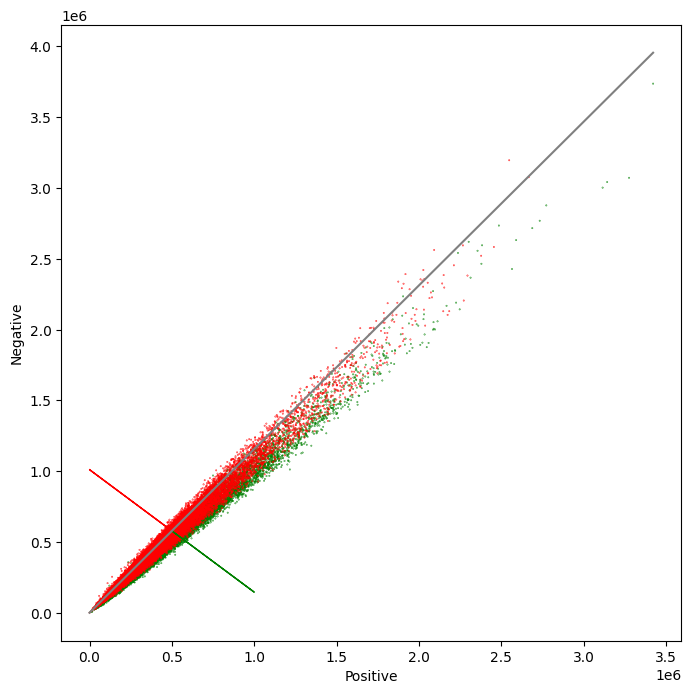

In [ ]:
# Plot the samples using columns 1 and 2 of the matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color base on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# Now lets represent the logistic regression model in this chart.
maxpos = np.max(X[:,1])

offset = 500000 # The pos value for the direction vectors origin

# Plot a gray line that divides the 2 areas.
ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray')

# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()

In [ ]:

def predict_tweet(s, freqs, theta):

    # extract the features of the tweet and store it into x
    x = extract_features(s,freqs)

    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x, theta))


    return y_pred

In [ ]:

for s in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (s, predict_tweet(s, freqs, theta)))


I am happy -> 0.710587
I am bad -> 0.000005
this movie should have been great. -> 0.977473
great -> 0.999989
great great -> 1.000000
great great great -> 1.000000
great great great great -> 1.000000


In [ ]:
print(len(test_x))

10000


In [ ]:
df=pd.read_csv('test_data.csv')

In [ ]:
df

,Id,text
0,0,What can possibly said about this movie other ...
1,1,I dont care how many bad reviews purple rain g...
2,2,Ken Russell directed this weird Not very ero...
3,3,This is a great movie from the lost age of rea...
4,4,I have a problem with the movie snobs who cons...
...,...,...
9995,9995,I first saw this on Thames television and love...
9996,9996,There are rumours that a fourth Underworld is ...
9997,9997,Jag är nyfiken Yellow is a lot of fun Like at...
9998,9998,A widely unknown strange little western with m...


In [ ]:
import pandas as pd


# Tạo một danh sách để lưu trữ dự đoán
sentiments = []

# Duyệt qua từng tweet và dự đoán cảm xúc
for tweet in test_x:
    y_hat = predict_tweet(tweet, freqs, theta)
    if y_hat > 0.5:
        sentiments.append(1)  # Positive sentiment
    else:
        sentiments.append(0)  # Negative sentiment

df['Category'] = sentiments

# Xóa trường 'text'
df = df.drop(columns=['text'])

# Đổi tên các trường
df = df.rename(columns={'id': 'Id'})


In [ ]:
print(len(sentiments))

10000


In [ ]:
df.to_csv('logistic_regression_2.csv', index=False)